<a href="https://colab.research.google.com/github/rayhansfr/LokaFresh-ML/blob/main/test_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import locale
import pandas as pd

month_replacements = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

# Load the data
bawang_putih = pd.read_excel('bawang putih.xlsx')
cabe_merah = pd.read_excel('cabe merah.xlsx')
bawang_merah = pd.read_excel('bawang merah.xlsx')


# Function to preprocess data
def preprocess_data(data):
    # Convert the 'Tanggal' column to datetime
    data['Tanggal'] = data['Tanggal'].replace(month_replacements, regex=True)
    data['Tanggal'] = pd.to_datetime(data['Tanggal'])
    # data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d %B %Y')
    data.set_index('Tanggal', inplace=True)
    data = data[['Harga']]
    return data

# Preprocess the data
bawang_putih = preprocess_data(bawang_putih)
cabe_merah = preprocess_data(cabe_merah)
bawang_merah = preprocess_data(bawang_merah)

In [ ]:
cabe_merah.head()

,Harga
Tanggal,
2024-01-01,86139
2024-01-02,84922
2024-01-03,84703
2024-01-04,84164
2024-01-05,83740


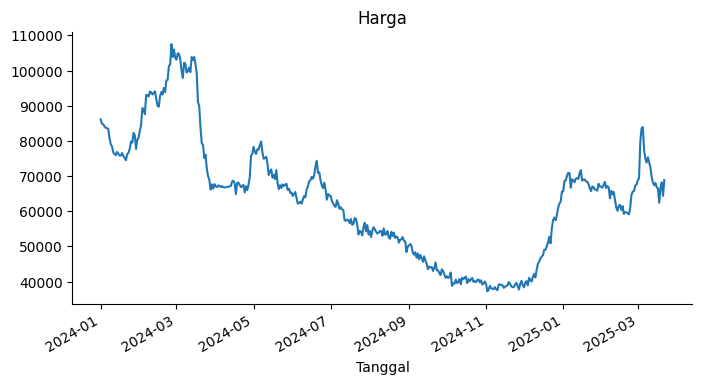

In [ ]:
from matplotlib import pyplot as plt
cabe_merah['Harga'].plot(kind='line', figsize=(8, 4), title='Harga')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
bawang_merah.head()

,Harga
Tanggal,
2024-01-01,42054
2024-01-02,42287
2024-01-03,41969
2024-01-04,41523
2024-01-05,41807


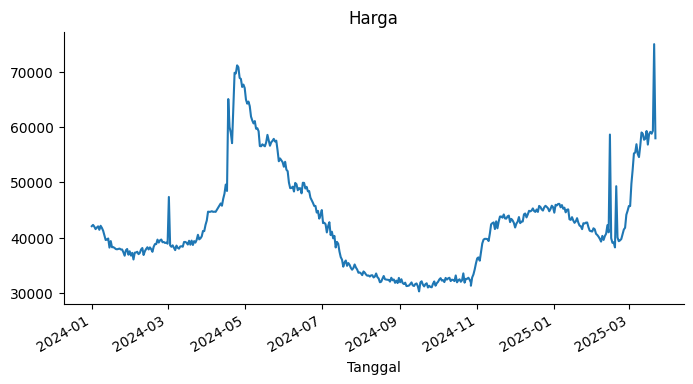

In [ ]:
from matplotlib import pyplot as plt
bawang_merah['Harga'].plot(kind='line', figsize=(8, 4), title='Harga')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
bawang_putih.head()

,Harga
Tanggal,
2024-01-01,41544
2024-01-02,40783
2024-01-03,41989
2024-01-04,41530
2024-01-05,41762


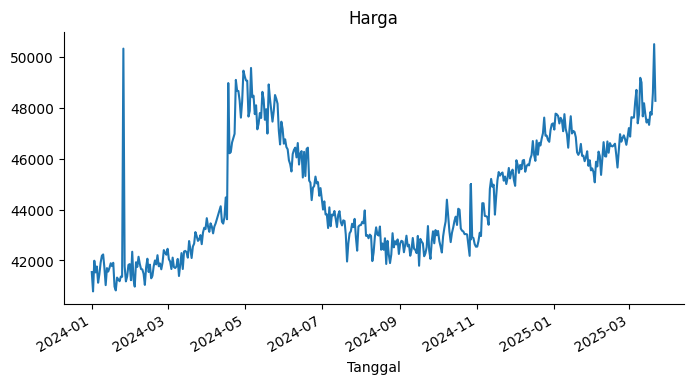

In [ ]:
from matplotlib import pyplot as plt
bawang_putih['Harga'].plot(kind='line', figsize=(8, 4), title='Harga')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

bawang_putih_scaled = scaler.fit_transform(bawang_putih)
cabe_merah_scaled = scaler.fit_transform(cabe_merah)
bawang_merah_scaled = scaler.fit_transform(bawang_merah)

In [ ]:
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Use 60 days of data to predict the next day
X_bp, y_bp = create_sequences(bawang_putih_scaled, time_step)
X_cm, y_cm = create_sequences(cabe_merah_scaled, time_step)
X_bm, y_bm = create_sequences(bawang_merah_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X_bp = X_bp.reshape(X_bp.shape[0], X_bp.shape[1], 1)
X_cm = X_cm.reshape(X_cm.shape[0], X_cm.shape[1], 1)
X_bm = X_bm.reshape(X_bm.shape[0], X_bm.shape[1], 1)

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model_bp = build_lstm_model((X_bp.shape[1], 1))
model_cm = build_lstm_model((X_cm.shape[1], 1))
model_bm = build_lstm_model((X_bm.shape[1], 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

model_bp.fit(X_bp, y_bp, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)
model_cm.fit(X_cm, y_cm, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)
model_bm.fit(X_bm, y_bm, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0645
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0119
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0134
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0101
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0098
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0085
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0082
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0080
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0079
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0063
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0086
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0070
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0065
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0078
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - lo

In [ ]:
def predict_future(model, data, time_step, future_days):
    predictions = []
    last_sequence = data[-time_step:]
    for _ in range(future_days):
        pred = model.predict(last_sequence.reshape(1, time_step, 1))
        predictions.append(pred[0, 0])
        last_sequence = np.append(last_sequence[1:], pred)
    return np.array(predictions)

future_days = 90  # Forecast for 3 months
bp_predictions = predict_future(model_bp, bawang_putih_scaled, time_step, future_days)
cm_predictions = predict_future(model_cm, cabe_merah_scaled, time_step, future_days)
bm_predictions = predict_future(model_bm, bawang_merah_scaled, time_step, future_days)

# Inverse transform the predictions to get actual prices
bp_predictions = scaler.inverse_transform(bp_predictions.reshape(-1, 1))
cm_predictions = scaler.inverse_transform(cm_predictions.reshape(-1, 1))
bm_predictions = scaler.inverse_transform(bm_predictions.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

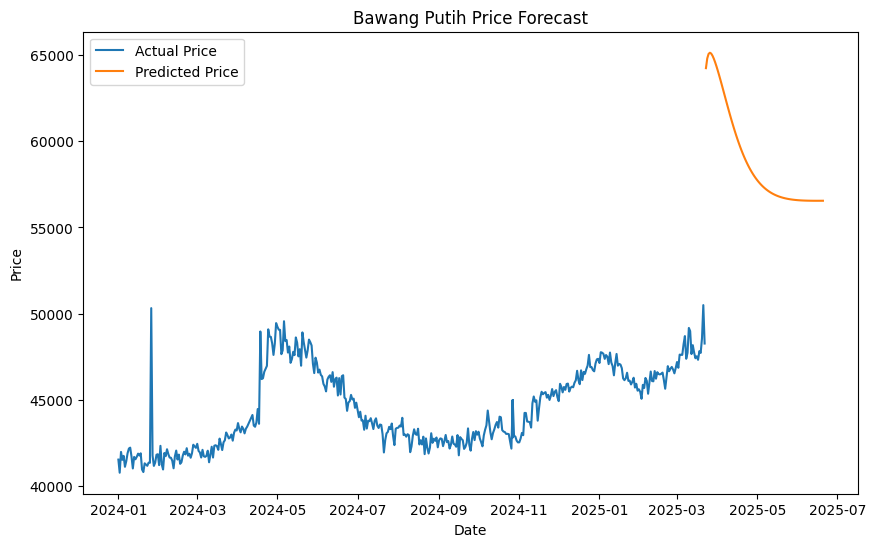

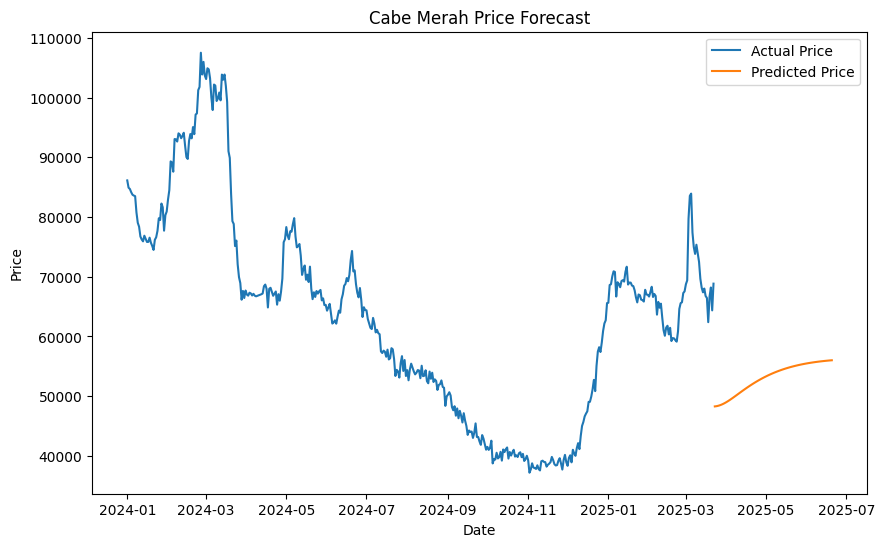

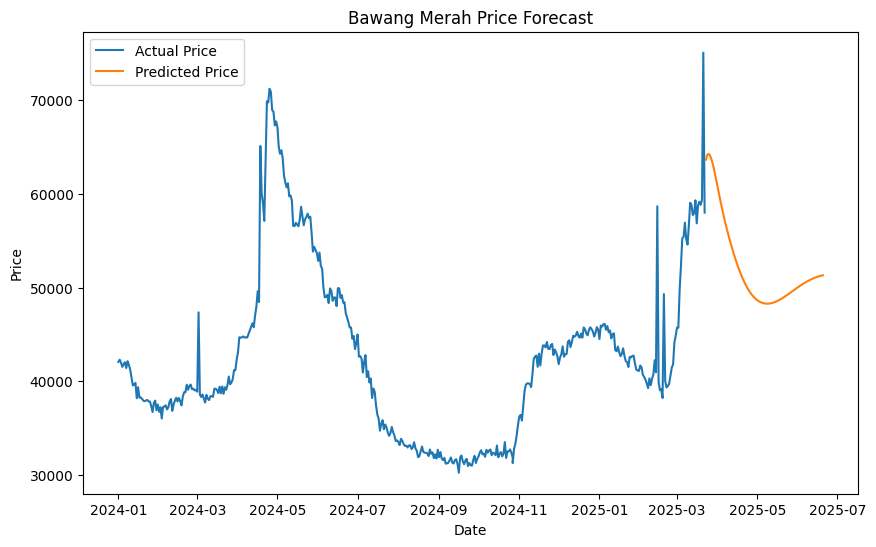

In [ ]:
def plot_predictions(actual, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(actual.index, actual['Harga'], label='Actual Price')
    future_dates = pd.date_range(start=actual.index[-1], periods=len(predictions)+1, freq='D')[1:]
    plt.plot(future_dates, predictions, label='Predicted Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_predictions(bawang_putih, bp_predictions, 'Bawang Putih Price Forecast')
plot_predictions(cabe_merah, cm_predictions, 'Cabe Merah Price Forecast')
plot_predictions(bawang_merah, bm_predictions, 'Bawang Merah Price Forecast')

In [ ]:
# Print bawang putih predictions
print("Bawang Putih Predictions:")
for i, price in enumerate(bp_predictions, 1):
    print(f"Day {i}: {price[0]:.2f}")

# Print cabe merah predictions
print("\nCabe Merah Predictions:")
for i, price in enumerate(cm_predictions, 1):
    print(f"Day {i}: {price[0]:.2f}")

# Print bawang merah predictions
print("\nBawang Merah Predictions:")
for i, price in enumerate(bm_predictions, 1):
    print(f"Day {i}: {price[0]:.2f}")

Bawang Putih Predictions:
Day 1: 64236.22
Day 2: 64802.01
Day 3: 65061.26
Day 4: 65130.82
Day 5: 65081.92
Day 6: 64957.55
Day 7: 64783.65
Day 8: 64576.02
Day 9: 64344.58
Day 10: 64095.86
Day 11: 63834.46
Day 12: 63563.89
Day 13: 63286.98
Day 14: 63006.15
Day 15: 62723.50
Day 16: 62440.91
Day 17: 62160.03
Day 18: 61882.31
Day 19: 61609.02
Day 20: 61341.28
Day 21: 61080.01
Day 22: 60825.96
Day 23: 60579.80
Day 24: 60342.00
Day 25: 60112.96
Day 26: 59892.92
Day 27: 59682.09
Day 28: 59480.53
Day 29: 59288.28
Day 30: 59105.27
Day 31: 58931.41
Day 32: 58766.55
Day 33: 58610.49
Day 34: 58463.01
Day 35: 58323.87
Day 36: 58192.80
Day 37: 58069.48
Day 38: 57953.67
Day 39: 57845.03
Day 40: 57743.26
Day 41: 57648.05
Day 42: 57559.10
Day 43: 57476.09
Day 44: 57398.72
Day 45: 57326.70
Day 46: 57259.76
Day 47: 57197.59
Day 48: 57139.92
Day 49: 57086.52
Day 50: 57037.11
Day 51: 56991.45
Day 52: 56949.32
Day 53: 56910.50
Day 54: 56874.77
Day 55: 56841.93
Day 56: 56811.80
Day 57: 56784.19
Day 58: 56758.